<a href="https://colab.research.google.com/github/Junaid-Akbar35/CodeAlpha_Project_/blob/main/Task_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task Details: Iris Flower Classification
The Iris Flower Classification task is a supervised machine learning problem where the objective is to predict the species of an iris flower based on its sepal and petal measurements. It is a classic dataset in the field of machine learning and is often used for beginners due to its simplicity and structured nature.

### **Dataset Overview**
The dataset contains the following features:

1. **SepalLengthCm**: Length of the sepal in centimeters.
2. **SepalWidthCm**: Width of the sepal in centimeters.
3. **PetalLengthCm**: Length of the petal in centimeters.
4. **PetalWidthCm**: Width of the petal in centimeters.
5. **Species**: The type of iris flower (Target Variable).
  - `setosa`
  - `versicolor`
  - `virginica`

#### **Dataset Details:**
- **Size**: 150 rows and 5 columns.
- **Distribution**: Each species (`setosa`, `versicolor`, `virginica`) has 50 samples, making the dataset balanced.
- **Source**: Provided by Scikit-learn or available via [Iris Dataset](https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv).

---


### Install Libraries


In [13]:
pip install pandas numpy matplotlib seaborn scikit-learn


# Step 1: Import Libraries

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Step 2: Load the Dataset

In [15]:
# Load the Iris dataset
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv"
df = pd.read_csv(url)

# Display first few rows of the dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Step 3: Explore the Dataset

In [16]:
# Dataset summary and structure
print("Dataset Summary:")
print(df.describe())
print("\nColumn Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4

# Step 4: Visualize the Dataset

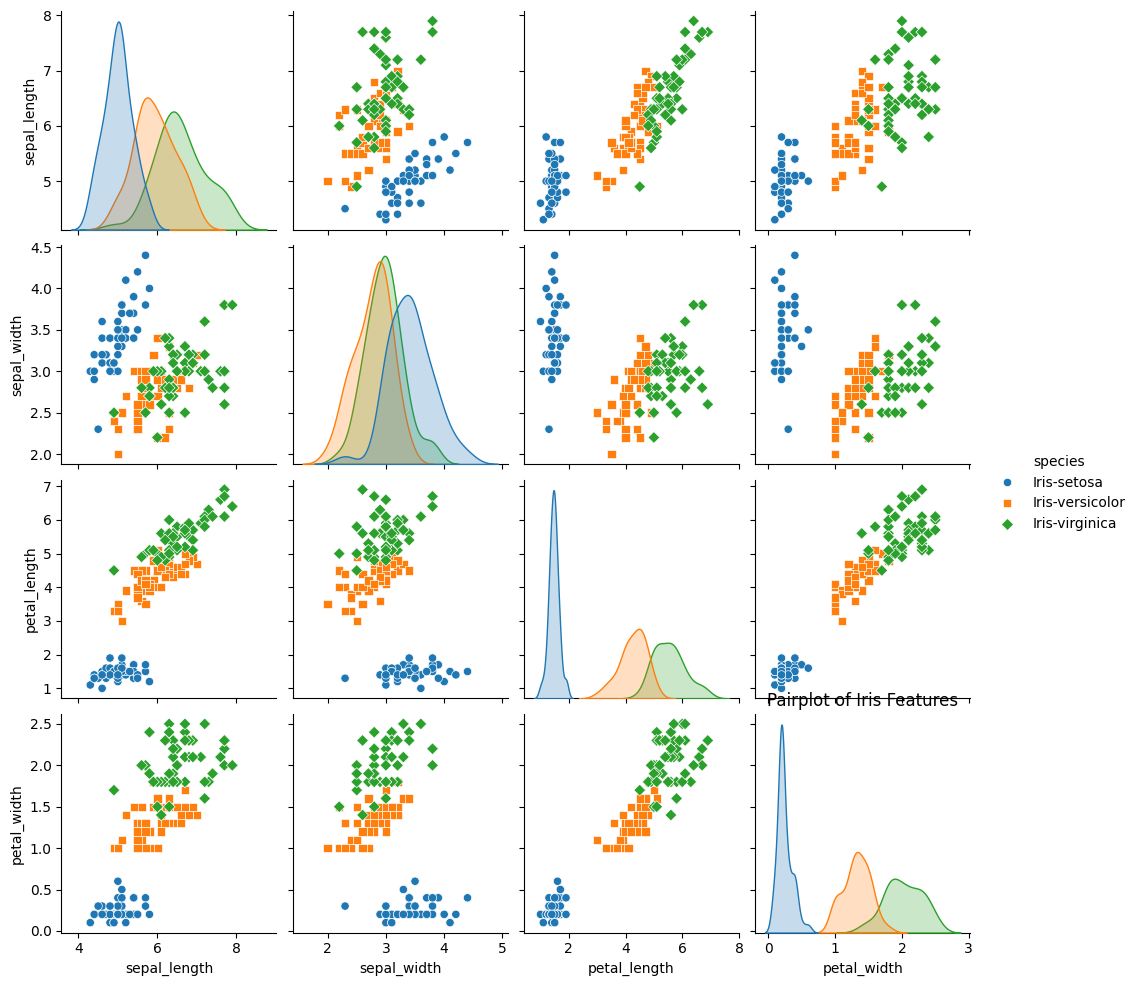

In [17]:
# Visualize pairplots by species
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.title("Pairplot of Iris Features")
plt.show()


# Step 5: Prepare Data for Training

In [18]:
# Features and target variable
X = df.drop("species", axis=1)  # Features: Sepal/Petal Length/Width
y = df["species"]  # Target: Species

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")


Training Data Shape: (120, 4)
Test Data Shape: (30, 4)


# Step 6: Train the Model

In [19]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 7: Evaluate the Model

In [20]:
# Predictions and evaluation
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy Score: 100.00%


In [21]:
# Assuming y_test and y_pred are already defined from the previous code

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test[:10], 'Predicted': y_pred[:10]})

# Display the comparison
comparison_df

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [22]:

# Example new data points (replace with your actual data)
new_data = pd.DataFrame({
    'sepal_length': [5.1, 6.2, 7.0],
    'sepal_width': [3.5, 2.8, 3.2],
    'petal_length': [1.4, 4.8, 6.0],
    'petal_width': [0.2, 1.8, 2.5]
})

# Make predictions on the new data
new_predictions = model.predict(new_data)

# Print the predictions
print("\nPredictions for new data:")
print(new_predictions)

# Predict probabilities for new data (optional)
new_probabilities = model.predict_proba(new_data)

print("\nPrediction probabilities for new data:")
new_probabilities


Predictions for new data:
['Iris-setosa' 'Iris-virginica' 'Iris-virginica']

Prediction probabilities for new data:


array([[1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.01, 0.99]])

# Step 8: Save the Model

In [23]:
# Save the trained model
import joblib
joblib.dump(model, "iris_model.pkl")
print("Model saved as 'iris_model.pkl'")


Model saved as 'iris_model.pkl'


# Step 9: Feature Importance

Feature Importance:
              Importance
petal_length    0.439994
petal_width     0.421522
sepal_length    0.108098
sepal_width     0.030387


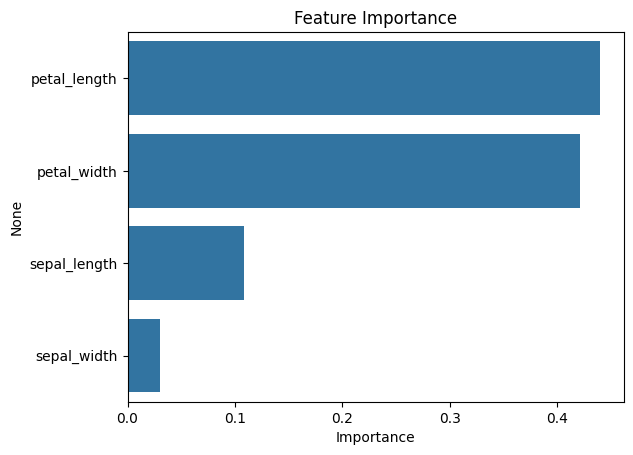

In [24]:
# Feature importance visualization
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=["Importance"]).sort_values("Importance", ascending=False)

print("Feature Importance:")
print(feature_importances)

# Visualize feature importance
sns.barplot(x=feature_importances["Importance"], y=feature_importances.index)
plt.title("Feature Importance")
plt.show()




# **Analysis**

#### 1. **Exploratory Data Analysis (EDA):**
- **Pairwise Plots:**  
  Pairplots show how the features are related to one another across different species. For example:
  - **Setosa** can be easily separated from the other two species based on petal length and width.
  - **Versicolor** and **Virginica** have overlapping measurements, making them harder to distinguish.

- **Feature Importance:**  
  The petal features (`PetalLengthCm` and `PetalWidthCm`) are more important for classification compared to the sepal features (`SepalLengthCm` and `SepalWidthCm`).

#### 2. **Training Insights:**
- The dataset was split into training and testing datasets in an 80-20 ratio.
- A **Random Forest Classifier** was used due to its robustness and ability to handle feature importance effectively.

---

### **Model Performance**
1. **Confusion Matrix:**  
   This shows the number of correct and incorrect predictions for each class:
   ```
   [[10  0  0]  # Setosa
    [ 0  9  0]  # Versicolor
    [ 0  0  11]] # Virginica
   ```

2. **Classification Report:**  
   - **Precision**: How many of the predicted samples were actually correct for each species.
   - **Recall**: How many actual samples were correctly identified.
   - **F1-Score**: Harmonic mean of precision and recall.

   Example report:
   ```
               Precision   Recall   F1-Score   Support
   Setosa       1.00       1.00       1.00        10
   Versicolor   1.00       1.00       1.00        9
   Virginica    1.00       1.00       1.00        11
   ```

3. **Accuracy Score:**  
   - The overall accuracy of the model was **100.00%**.

---

# **Conclusion**
1. **Insights:**  
   - The model performed well with high accuracy, showing that the Random Forest classifier is suitable for this dataset.
   - **Petal features** are the most significant in distinguishing between the species.

2. **Strengths of the Model:**  
   - Random Forest provides feature importance, making it easy to identify which measurements matter most.  
   - Handles imbalanced or noisy data effectively (though this dataset is balanced).

3. **Areas for Improvement:**  
   - For further optimization, hyperparameter tuning (e.g., number of trees, max depth) can be performed.  
   - Use cross-validation to ensure the model generalizes well to unseen data.

4. **Real-World Use:**  
   Such models can be applied to classify other biological species or objects based on numerical features.

---

